# Лабораторная работа №2
## Выполнила: Пилипенко Елизавета
## Группа: ИДБ-22-13

In [ ]:
import os
import pandas as pd

# Загрузка данных из папки
def load_data_from_folder(base_folder):
    data = []
    for sub_folder in ['Src', 'Tokenized']:  # Обходим обе папки
        folder_path = os.path.join(base_folder, sub_folder)
        for language_folder in os.listdir(folder_path):
            language_path = os.path.join(folder_path, language_folder)
            if os.path.isdir(language_path):  # Проверяем, что это папка
                for file_name in os.listdir(language_path):
                    file_path = os.path.join(language_path, file_name)
                    if os.path.isfile(file_path):  # Убедимся, что это файл
                        try:
                            with open(file_path, 'r', encoding='utf-8') as f:
                                code = f.read()
                                data.append({'code': code, 'language': language_folder})
                        except Exception as e:
                            print(f"Ошибка чтения файла {file_path}: {e}")
    return pd.DataFrame(data)

base_folder = 'rosetta'  
data = load_data_from_folder(base_folder)

print(data)
# Проверяем загруженные данные
print(f"Загружено {len(data)} записей.")
print(data.head())

                                                    code      language
0      with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...           Ada
1      with Ada.Text_Io; use Ada.Text_Io;\n with Ada....           Ada
2      with Ada.Text_IO;\nwith Ada.Numerics.Discrete_...           Ada
3      with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...           Ada
4      with Ada.Text_Io; use Ada.Text_Io;\n\nprocedur...           Ada
...                                                  ...           ...
46347  ; x86_64 linux nasm struc Stack maxSize : resb...  X86-Assembly
46348  . data string : . asciz " Test " . text . glob...  X86-Assembly
46349  ; Assemble with : tasm ; tlink / t . model tin...  X86-Assembly
46350  ; GTK imports and defines etc . % define GTK_W...  X86-Assembly
46351  . 586 . model flat , stdcall option casemap : ...  X86-Assembly

[46352 rows x 2 columns]
Загружено 46352 записей.
                                                code language
0  with Ada.Text_Io; use Ada.Text_I

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных
def preprocess_code(code):
    # Удаляем комментарии
    code = re.sub(r'//.*?$|/\*.*?\*/', '', code, flags=re.DOTALL)
    # Удаляем лишние пробелы
    code = re.sub(r'\s+', ' ', code)
    return code.strip()

# Применяем предобработку
data['code'] = data['code'].apply(preprocess_code)
data.dropna(inplace=True)  # Удаляем пустые строки
print(f"После предобработки: {len(data)} записей.")


После предобработки: 46352 записей.


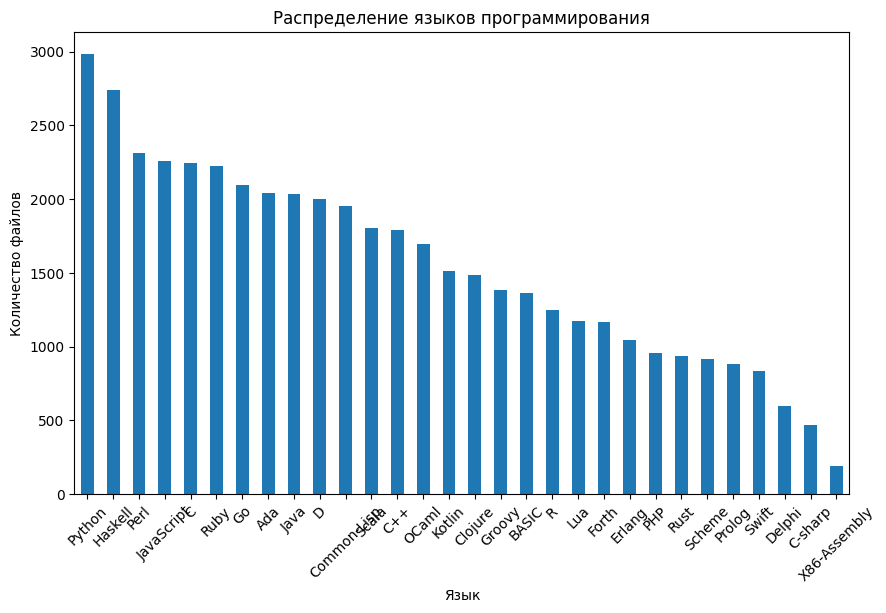

In [26]:
# Анализ данных
data['language'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Распределение языков программирования')
plt.xlabel('Язык')
plt.ylabel('Количество файлов')
plt.xticks(rotation=45)
plt.show()


## Bag-of-Words

Отчет о классификации:
              precision    recall  f1-score   support

         Ada       0.99      0.99      0.99       395
       BASIC       0.95      0.90      0.92       289
           C       0.95      0.95      0.95       435
         C++       0.95      0.93      0.94       358
     C-sharp       0.92      0.89      0.91       104
     Clojure       0.98      0.93      0.96       286
 Common-Lisp       0.98      0.95      0.96       405
           D       0.99      0.96      0.98       412
      Delphi       0.95      0.86      0.90       132
      Erlang       0.95      0.94      0.95       221
       Forth       0.92      0.94      0.93       219
          Go       0.96      0.95      0.95       435
      Groovy       0.94      0.91      0.93       300
     Haskell       0.93      0.95      0.94       502
        Java       0.91      0.93      0.92       377
  JavaScript       0.93      0.86      0.89       446
      Kotlin       0.67      0.99      0.80       318
    

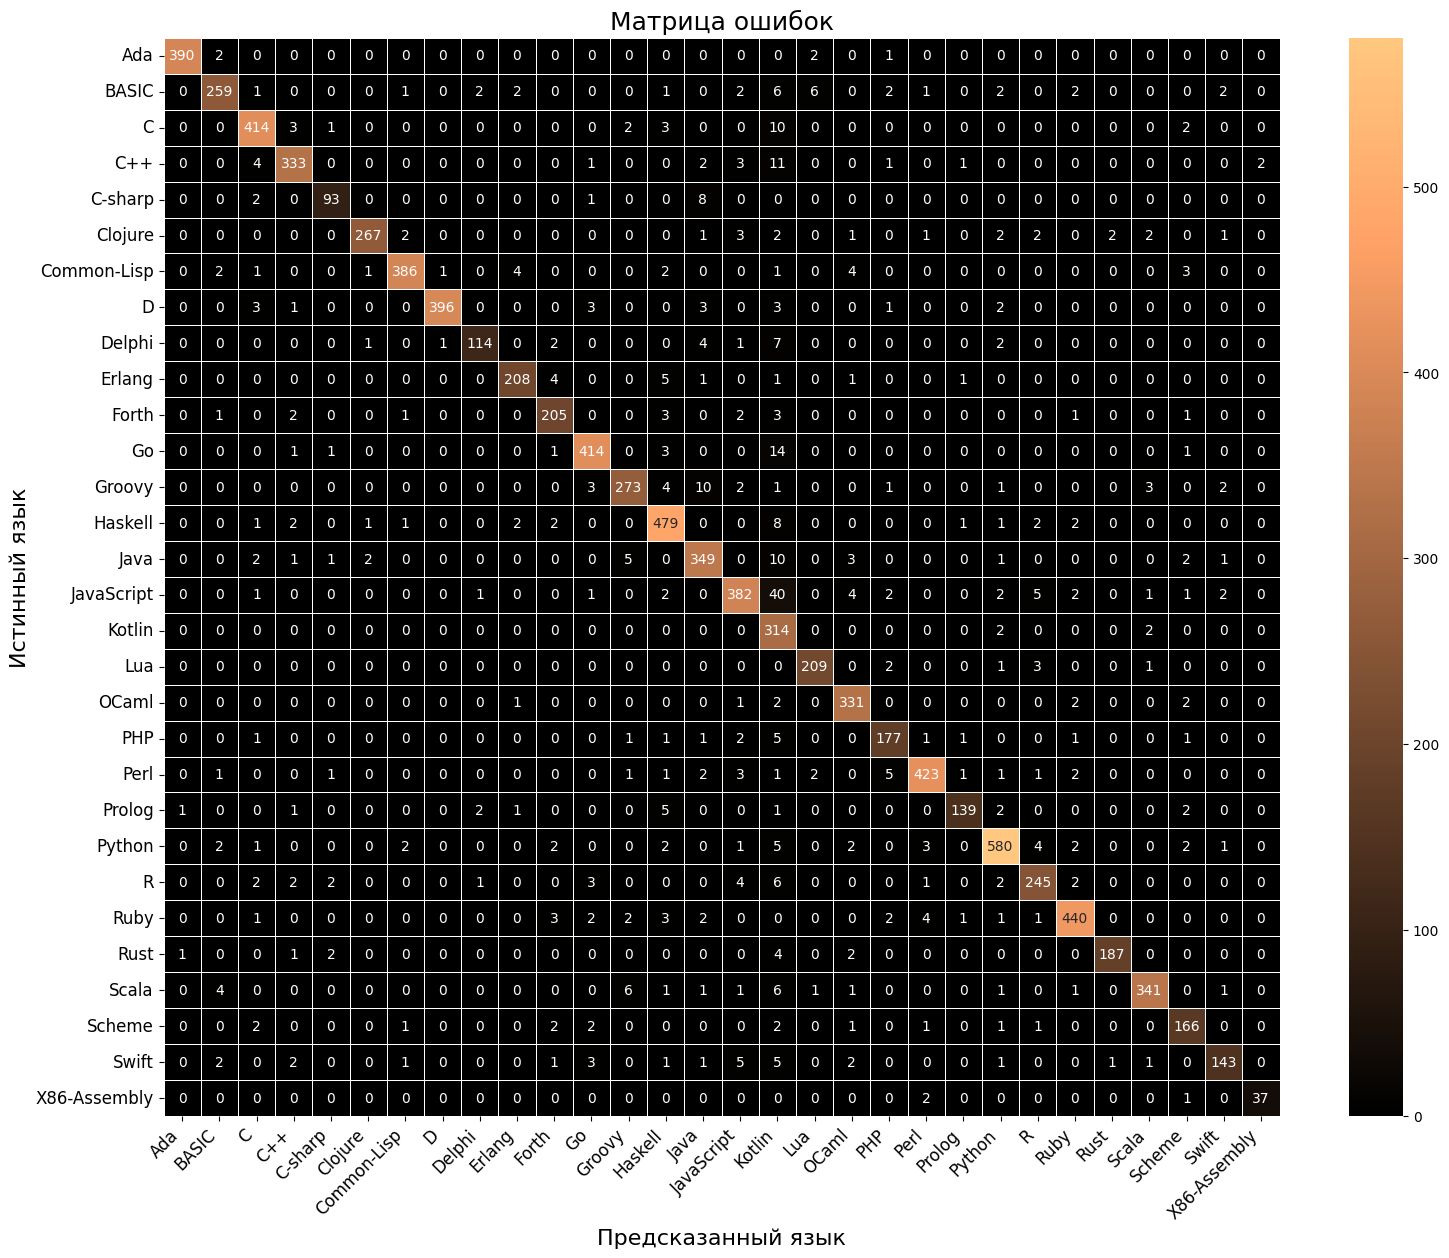

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Применяем концепцию Bag-of-Words с CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['code'])
y = data['language']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Используем seaborn для визуализации
plt.figure(figsize=(18, 14))  
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', xticklabels=model.classes_, yticklabels=model.classes_, cbar=True, linewidths=0.5)
plt.title('Матрица ошибок', fontsize=18)
plt.xlabel('Предсказанный язык', fontsize=16)
plt.ylabel('Истинный язык', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()



In [54]:
def predict_language(code_sample):
    # Преобразуем новый код в формат, который может быть принят моделью
    code_tfidf = vectorizer.transform([code_sample])
    # Используем модель для предсказания языка
    predicted_language = model.predict(code_tfidf)
    return predicted_language[0]


# Тестовые примеры
test_code_1 = '''
def add(a, b):
    return a + b
'''

test_code_2 = '''
function add(a, b) {
    return a + b;
}
'''

test_code_3 = '''
console.log("Hello, World!")
'''

# Получаем предсказания для тестовых примеров
print(f"Предсказанный язык для Python: {predict_language(test_code_1)}")  # Должен предсказать Python
print(f"Предсказанный язык для JavaScript: {predict_language(test_code_2)}")  # Должен предсказать JavaScript
print(f"Предсказанный язык для JavaScript: {predict_language(test_code_3)}")  # Должен предсказать JavaScript

Предсказанный язык для Python: Python
Предсказанный язык для JavaScript: PHP
Предсказанный язык для JavaScript: JavaScript


In [ ]:
languages = ['Ada', 'BASIC', 'C', 'C++', 'C-sharp', 'Clojure', 'Common-Lisp', "D", 'Delphi', 'Erlang', 'Forth', 'Go', 'Groovy', 
             'Haskell', 'Java', 'JavaScript', 'Kotlin', 'Lua', 'OCaml', 'PHP', 'Perl', 'Prolog', 'Python', 'R', 'Ruby', 
             'Rust', 'Scala', 'Scheme', 'Swift', 'X86-Assembly']
# выводим топ-10 ошибок
def analyze_errors(conf_matrix, languages):
    errors = []
    for i in range(len(languages)):
        for j in range(len(languages)):
            if i != j:  # Пропускаем диагональ
                errors.append((languages[i], languages[j], conf_matrix[i, j]))
    
    sorted_errors = sorted(errors, key=lambda x: x[2], reverse=True)
    
    print("Топ-10 ошибок:")
    for error in sorted_errors[:10]:
        print(f"Язык {error[0]} предсказан как {error[1]}: {error[2]} ошибок")
    
    return sorted_errors

# Анализ ошибок
sorted_errors = analyze_errors(cm, languages)




Топ-10 ошибок:
Язык JavaScript предсказан как Kotlin: 40 ошибок
Язык Go предсказан как Kotlin: 14 ошибок
Язык C++ предсказан как Kotlin: 11 ошибок
Язык C предсказан как Kotlin: 10 ошибок
Язык Groovy предсказан как Java: 10 ошибок
Язык Java предсказан как Kotlin: 10 ошибок
Язык C-sharp предсказан как Java: 8 ошибок
Язык Haskell предсказан как Kotlin: 8 ошибок
Язык Delphi предсказан как Kotlin: 7 ошибок
Язык BASIC предсказан как Kotlin: 6 ошибок


### Общая оценка работы модели:
Precision (точность): Модель в целом делает точные предсказания, так как для большинства классов значение precision выше 0.9. Это значит, что среди предсказанных положительных примеров значительная часть действительно относится к соответствующему классу.
Recall (полнота): Полнота также на высоком уровне для большинства классов, что говорит о том, что модель правильно находит большинство объектов каждого класса.
F1-score: Значения F1-score, в основном превышают 0.9, что свидетельствует о сбалансированной классификации.

Класс Kotlin имеет аномально низкое значение precision (0.67), хотя recall для него очень высок (0.99). Это указывает на проблему: модель предсказывает слишком много объектов как "Kotlin", но значительная часть из них классифицирована неверно(также это видно по "Топ-10 ошибок"). Причина может быть в схожести признаков "Kotlin" с другими классами.
Классы Delphi и JavaScript имеют относительно низкие значения recall (0.86 и 0.89 соответственно). Это говорит о том, что модель не обнаруживает всех объектов этих классов. Вероятно, часть из них ошибочно отнесена к другим классам.

# TF-IDF

Отчет о классификации:
              precision    recall  f1-score   support

         Ada       0.99      0.99      0.99       395
       BASIC       0.96      0.94      0.95       289
           C       0.95      0.94      0.95       435
         C++       0.97      0.92      0.94       358
     C-sharp       0.94      0.89      0.92       104
     Clojure       0.96      0.95      0.95       286
 Common-Lisp       0.97      0.95      0.96       405
           D       0.99      0.96      0.97       412
      Delphi       0.99      0.86      0.92       132
      Erlang       0.97      0.94      0.95       221
       Forth       0.93      0.94      0.93       219
          Go       0.96      0.94      0.95       435
      Groovy       0.93      0.93      0.93       300
     Haskell       0.93      0.95      0.94       502
        Java       0.93      0.92      0.93       377
  JavaScript       0.94      0.86      0.90       446
      Kotlin       0.67      0.99      0.80       318
    

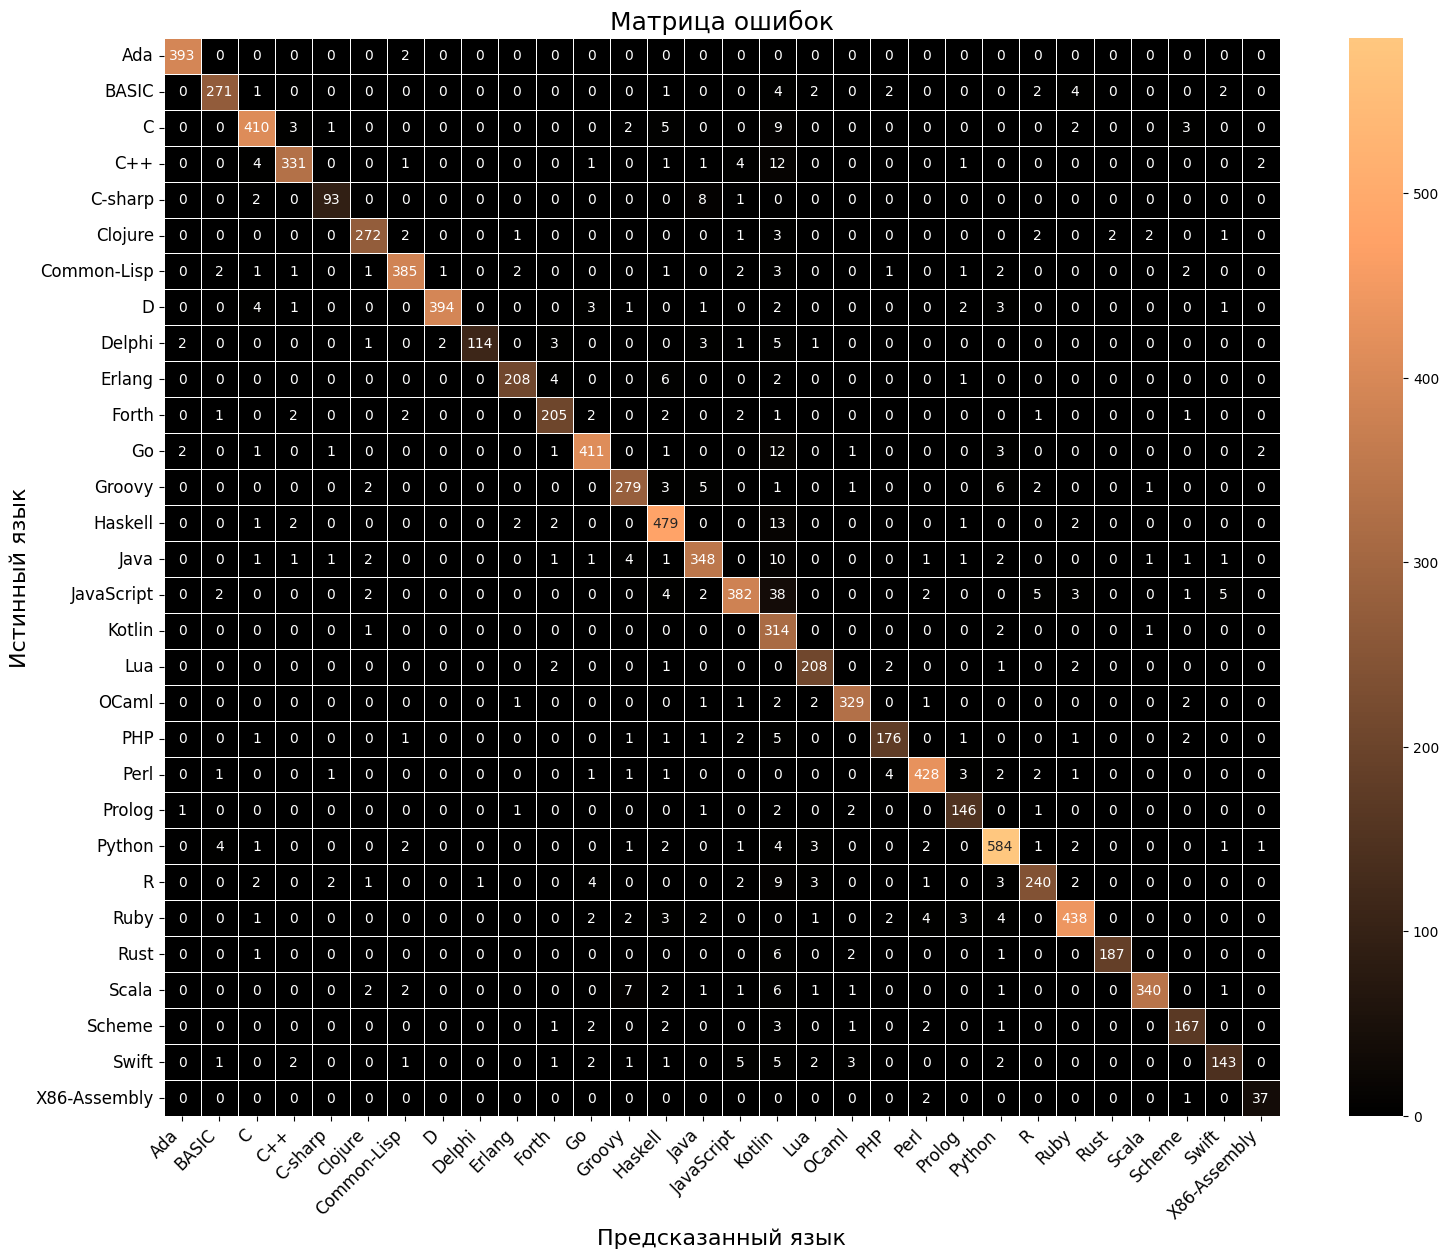

In [ ]:
# Преобразование данных
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))  
X = vectorizer.fit_transform(data['code'])
y = data['language']

# Разделение данных и обучение модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Используем RandomForestClassifier для обучения
modelTF = RandomForestClassifier(random_state=42)
modelTF.fit(X_train, y_train)

# Оценка модели
y_pred = modelTF.predict(X_test)
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cmTF = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Используем seaborn для визуализации 
plt.figure(figsize=(18, 14))  
sns.heatmap(cmTF, annot=True, fmt='d', cmap='copper', xticklabels=model.classes_, yticklabels=model.classes_, cbar=True, linewidths=0.5)
plt.title('Матрица ошибок', fontsize=18)
plt.xlabel('Предсказанный язык', fontsize=16)
plt.ylabel('Истинный язык', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()



In [50]:
def predict_language(code_sample):
    # Преобразуем новый код в формат, который может быть принят моделью
    code_tfidf = vectorizer.transform([code_sample])
    # Используем модель для предсказания языка
    predicted_language = modelTF.predict(code_tfidf)
    return predicted_language[0]

# Тестовые примеры
test_code_1 = '''
def add(a, b):
    return a + b
'''

test_code_2 = '''
function add(a, b) {
    return a + b;
}
'''

test_code_3 = '''
console.log("Hello, World!")
'''

# Получаем предсказания для тестовых примеров
print(f"Предсказанный язык для Python: {predict_language(test_code_1)}")  # Должен предсказать Python
print(f"Предсказанный язык для JavaScript: {predict_language(test_code_2)}")  # Должен предсказать JavaScript
print(f"Предсказанный язык для JavaScript: {predict_language(test_code_3)}")  # Должен предсказать JavaScript



Предсказанный язык для Python: Python
Предсказанный язык для JavaScript: PHP
Предсказанный язык для JavaScript: JavaScript


In [ ]:
languages = ['Ada', 'BASIC', 'C', 'C++', 'C-sharp', 'Clojure', 'Common-Lisp', "D", 'Delphi', 'Erlang', 'Forth', 'Go', 'Groovy', 
             'Haskell', 'Java', 'JavaScript', 'Kotlin', 'Lua', 'OCaml', 'PHP', 'Perl', 'Prolog', 'Python', 'R', 'Ruby', 
             'Rust', 'Scala', 'Scheme', 'Swift', 'X86-Assembly']
# выводим топ-10 ошибок
def analyze_errors(conf_matrix, languages):
    errors = []
    for i in range(len(languages)):
        for j in range(len(languages)):
            if i != j:  # Пропускаем диагональ
                errors.append((languages[i], languages[j], conf_matrix[i, j]))
    
    sorted_errors = sorted(errors, key=lambda x: x[2], reverse=True)
    
    print("Топ-10 ошибок:")
    for error in sorted_errors[:10]:
        print(f"Язык {error[0]} предсказан как {error[1]}: {error[2]} ошибок")
    
    return sorted_errors

# Анализ ошибок
sorted_errors = analyze_errors(cmTF, languages)




Топ-10 ошибок:
Язык JavaScript предсказан как Kotlin: 38 ошибок
Язык Haskell предсказан как Kotlin: 13 ошибок
Язык C++ предсказан как Kotlin: 12 ошибок
Язык Go предсказан как Kotlin: 12 ошибок
Язык Java предсказан как Kotlin: 10 ошибок
Язык C предсказан как Kotlin: 9 ошибок
Язык R предсказан как Kotlin: 9 ошибок
Язык C-sharp предсказан как Java: 8 ошибок
Язык Scala предсказан как Groovy: 7 ошибок
Язык Erlang предсказан как Haskell: 6 ошибок



### Общая характеристика модели
Большинство языков имеют F1-score в диапазоне 0.94–0.99. Это говорит о том, что модель хорошо распознаёт эти языки.
Низкий уровень ошибок в этих классах может быть связан с их уникальными признаками, которые легко различимы для модели.

Язык Kotlin выделяется низкой precision (0.67) и высоким recall (0.99). Это указывает на то, что модель часто предсказывает "Kotlin", даже если это неправильно, из-за чего возникают ложные срабатывания.
Язык JavaScript имеет recall 0.86, что ниже среднего, свидетельствуя о значительном количестве ошибок, когда "JavaScript" не распознаётся корректно. Наибольшее количество ошибок (38) возникает при предсказании JavaScript как Kotlin. Это говорит о том, что эти два языка имеют общие или схожие характеристики в представленных данных

Ошибка "Scala предсказан как Groovy" (7 случаев) может быть связана с тем, что эти языки используются в похожих контекстах (например, JVM).
Ошибка "Erlang предсказан как Haskell" (6 случаев) может быть объяснена схожестью в функциональном программировании.
Ошибки, где языки путаются с другими языками, которые логически близки по характеристикам (например, C++ с Kotlin или Java с Kotlin), могут быть связаны с общими элементами синтаксиса или стилями кода.

### **Сравнительный анализ Bag of Words и TF-IDF**

#### **Общие метрики**
- **Схожесть производительности**:
  - Precision, Recall, и F1-score для большинства классов почти идентичны в обоих методах. Это свидетельствует о том, что оба подхода способны хорошо захватывать характеристики данных.
  - Высокие метрики (около 0.94–0.99) наблюдаются у большинства языков.

- **Kotlin остается проблемным языком**:
  - В обоих подходах precision для Kotlin остается низким (0.67). Однако recall (0.99) указывает на склонность модели к избыточным ложным срабатываниям.

#### **Общие закономерности**:
- **Kotlin** является основным источником ошибок в обоих методах:
  - В Bag of Words на "Kotlin" приходится большинство ложных срабатываний, особенно с языками JavaScript (40 ошибок), Go (14), C++ (11), и Java (10).
  - TF-IDF демонстрирует схожую проблему с путаницей "Kotlin" с JavaScript (38 ошибок), Haskell (13), C++ (12), и Go (12).

- **JavaScript как Kotlin**:
  - Количество ошибок остается стабильно высоким: 40 (Bag of Words) и 38 (TF-IDF). Это говорит о том, что признаки JavaScript и Kotlin имеют схожие векторы в обоих методах.

- **Схожие ошибки**:
  - Ошибки, такие как "C-sharp предсказан как Java" (8 для обоих методов) и "C++ предсказан как Kotlin" (11 для BoW и 12 для TF-IDF), указывают на общие трудности различения языков с похожей синтаксической структурой.

#### **Различия в ошибках**:
- **Bag of Words**:
  - У Bag of Words появляется путаница, например, "Groovy как Java" (10 ошибок), что указывает на некоторую слабость, связанных с JVM.

- **TF-IDF**:
  - TF-IDF лучше справляется с различением Groovy, но имеет больше ошибок, связанных с языком R, который предсказан как Kotlin (9 ошибок, отсутствующих в Bag of Words).

#### **Сравнение по метрикам для классов**

**Precision** Bag of Words даёт больше ложных предсказаний на отдельные классы (например, Java). 
**Recall** TF-IDF немного лучше отличает редкие классы, такие как Scala и Groovy. 

#### **Основные выводы**
- **Преимущества Bag of Words**:
  - Простая и устойчивая модель, которая показывает высокие результаты.
  - Хорошо работает с языками, имеющими уникальные ключевые слова или синтаксис (например, Ada, BASIC).

- **Преимущества TF-IDF**:
  - Лучше справляется с языками, использующими редкие слова(например, R, Scala).
  - Уменьшает избыточное влияние часто встречающихся слов, улучшая точность для классов, которые легко путаются (например, Groovy).